# 数学建模代码

##### 说明

这里汇总了数学建模中部分代码，主要为调用库完成，不建议当笔记用，因为有些东西根本用不上(划掉，这叫赌题 doge)，但懒得删了  
另外，这里的库大多是通用型的，处理很大规模的数据时可能会有性能问题，可能需要换用更专业的库  
建议先检查环境  

2024.1.23 0:43更新：啊啊啊写不完了，代码直接找chatgpt去cv得了，反正能用能跑就行，写这文件的目的就是怕环境或者参数格式等出问题  
2024.1.24 0:36更新：还是写不完怎么办，懂了，把太难的直接删掉，有效降低任务量

In [1]:
# 检查库及版本(建议折叠一下这个代码块，太长了)
update = []
miss = []
try:
    import numpy
    if numpy.__version__ < '1.26.3':
        update.append('numpy')
except:
    miss.append('numpy')
try:
    import pandas
    if pandas.__version__ < '2.2.0':
        update.append('pandas')
except:
    miss.append('pandas')
try:
    import matplotlib
    if matplotlib.__version__ < '3.8.2':
        update.append('matplotlib')
except:
    miss.append('matplotlib')
try:
    import scipy
    if scipy.__version__ < '1.12.0':
        update.append('scipy')
except:
    miss.append('scipy')
try:
    import pykrige
    if pykrige.__version__ < '1.7.1':
        update.append('pykrige')
except:
    miss.append('pykrige')
try:
    import sklearn
    if sklearn.__version__ < '1.4.0':
        update.append('scikit-learn')
except:
    miss.append('scikit-learn')
try:
    import pywt
    if pywt.__version__ < '1.5.0':
        update.append('PyWavelets')
except:
    miss.append('PyWavelets')
try:
    import seaborn
    if seaborn.__version__ < '0.13.1':
        update.append('seaborn')
except:
    miss.append('seaborn')
try:
    import factor_analyzer
    print('factor_analyzer库不提供版本号,如果遇到异常,请手动检查是否低于0.5.0(pip show factor_analyzer)')
except:
    miss.append('factor_analyzer')
    print('缺乏factor_analyzer库,此库和使用的scipy版本冲突,在安装后需简单修改源码以适配本程序(用到的地方会说怎么改的)')
try:
    import networkx
    if networkx.__version__ < '3.2.1':
        update.append('networkx')
except:
    miss.append('networkx')
try:
    import skfuzzy
    if skfuzzy.__version__ < '0.4.2':
        update.append('scikit-fuzzy')
except:
    miss.append('scikit-fuzzy')
try:
    import tensorflow
    if tensorflow.__version__ < '2.15.0':
        print('tensorflow需要更新...额...不管它了')
except:
    print('缺少tensorflow库...不过咱们也用不了这玩意吧？')
try:
    import sympy
    if sympy.__version__ < '1.12':
        update.append('sympy')
except:
    miss.append('sympy')

print('库检查完成')
if miss.__len__() != 0:
    print('共缺少%d个库' % miss.__len__())
    code = 'pip install'
    for i in miss:
        code = code + ' ' + i
    print(code)
else:
    print('所需库均已安装')
if update.__len__() != 0:
    print('共%d个库版本低于推荐' % update.__len__())
    code = 'pip install --upgrade'
    for i in update:
        code = code + ' ' + i
    print(code)
else:
    print('所需库版本符合要求')
if miss.__len__() != 0 or update.__len__() != 0:
    print('安装命令已给出，不过有些库听着就很抽象，大概率用不到那个功能，可以忽略')

import sys
if sys.version_info < (3, 10, 10):
    print('当前python版本低于3.10.10,可能导致部分功能异常')

factor_analyzer库不提供版本号,如果遇到异常,请手动检查是否低于0.5.0(pip show factor_analyzer)

库检查完成
所需库均已安装
共4个库版本低于推荐
pip install --upgrade numpy pandas scipy scikit-learn
安装命令已给出，不过有些库听着就很抽象，大概率用不到那个功能，可以忽略
当前python版本低于3.10.10,可能导致部分功能异常


## 第一部分 数据处理

内容摘要：插值拟合、数据降维、分类/异常值检测

### 一、插值拟合

内容摘要：一维插值(样条、lagrange、rbf),二维插值(griddata、rbf、kriging),最小二乘拟合,分段拟合

#### 1.一维插值

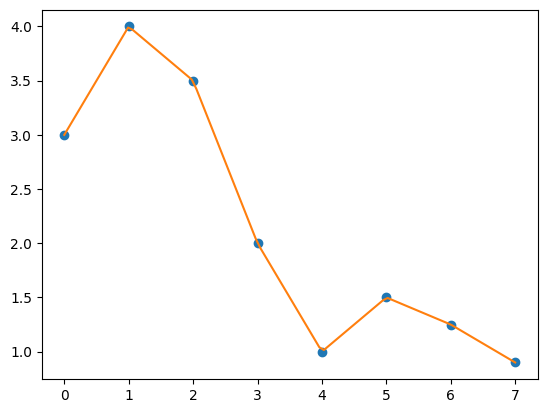

In [2]:
# 对比见python example.py 1.1.1
import numpy as np
import matplotlib.pyplot as plt

x= np.array([0, 1, 2, 3, 4, 5, 6, 7])
y= np.array([3, 4, 3.5, 2, 1, 1.5, 1.25, 0.9])

allx = np.linspace(x.min(), x.max(), 100)

from scipy.interpolate import interp1d, lagrange, Rbf
f = interp1d(x, y, kind = 'linear') #nearest, zero, linear, quadratic, cubic
#f = lagrange(x, y)
#f = Rbf(x, y, function='linear') #cubic, gaussian, inverse_multiquadric, linear, multiquadric, quintic, thin_plate
res = f(allx)

plt.plot(x, y, 'o', allx, res, '-')
plt.show()

#### 2.二维插值

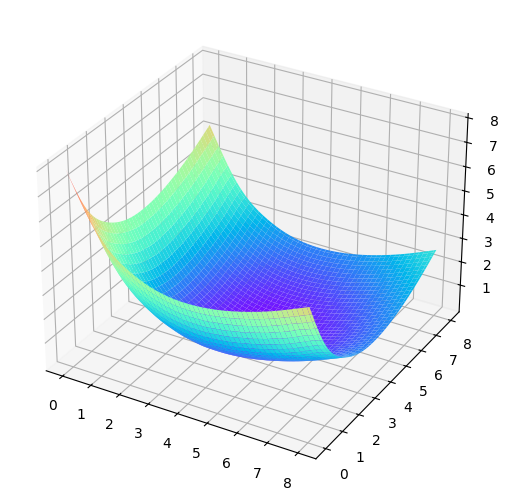

In [3]:
# 动图见python example.py 1.1.1
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
xx,yy = np.meshgrid(x,y)
values = (xx-4)**2/(xx+4) + (yy-4)**2/(yy+4) 

xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
X, Y = np.meshgrid(xi, yi)

from scipy.interpolate import griddata, Rbf
Z = griddata((xx.flatten(),yy.flatten()), values.flatten(),(X.flatten(),Y.flatten()), method='cubic').reshape(X.shape) #linear,cubic,nearest
# f = Rbf(xx.flatten(), yy.flatten(), values.flatten(), method='cubic') #multiquadric, inverse, gaussian, linear, cubic, quintic, thin_plate
# Z = f(X.flatten(), Y.flatten()).reshape(X.shape)
# from pykrige.ok import OrdinaryKriging
# OK = OrdinaryKriging(xx.flatten(), yy.flatten(), values.flatten(), variogram_model='power') #linear, power, gaussian, spherical, exponential
# Z, s = OK.execute('grid', xi, yi) # s为方差，这里也可以使用'point'模式，后面传的xi,yi为点坐标

fig = plt.figure()
ax = fig.add_axes(Axes3D(fig))
ax.plot_surface(X, Y, Z, cmap='rainbow') #rainbow,coolwarm
plt.show()

#### 3.最小二乘拟合

-0.06328305950231554 1.3474145835550388


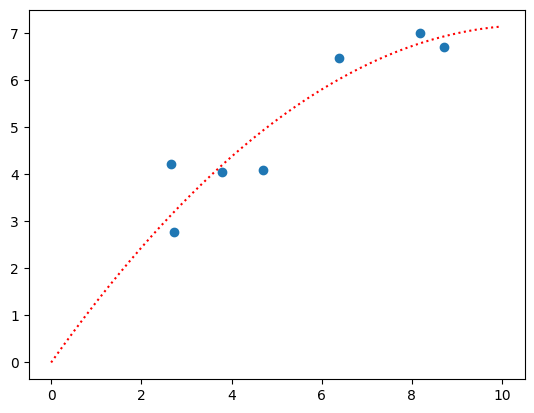

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([8.19, 2.72, 6.39, 8.71, 4.7, 2.66, 3.78])
y = np.array([7.01, 2.78, 6.47, 6.71, 4.1, 4.23, 4.05])
xi=np.linspace(0,10,1000)

from scipy.optimize import leastsq
def residuals(p, y, x):
    k, b = p
    return y - (k * x * x + b * x)
p,pcov = leastsq(residuals, [1,0], args=(y, x)) #参数为残差公式，初始参数，需要拟合的数据，拟合目标为残差平方和最小，pcov为方差
k, b = p

print(k,b)
yi=k*xi*xi+b*xi
plt.scatter(x, y, marker='o')
plt.plot(xi, yi, color='r',linestyle=":")
plt.show()

#### 4.分段拟合

[ 5.9981956  14.9963912   2.         13.89012121]


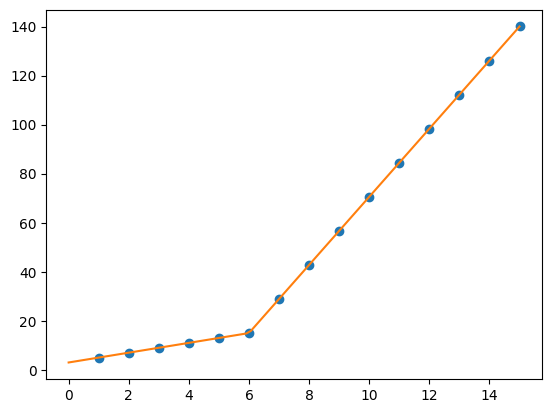

In [5]:
#分段拟合极易陷入局部最优解，利用数据特征减少参数个数，设置合理的初始参数，可以提高效果
import numpy as np
import matplotlib.pyplot as plt
 
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13, 14, 15], dtype=float)
y = np.array([5, 7, 9, 11, 13, 15, 28.92, 42.81, 56.7, 70.59, 
	                 84.47, 98.36, 112.25, 126.14, 140.03]) 
xi = np.linspace(0, 15, 100)

from scipy import optimize
def piecewise_linear(x, x0, y0, k1, k2):
    return np.piecewise(x, [x < x0, x >= x0], [lambda x:k1*x + y0-k1*x0, 
                                   lambda x:k2*x + y0-k2*x0])
p, pcov = optimize.curve_fit(piecewise_linear, x, y, p0=[8, 1, 1, 1])

print(p)
plt.plot(x, y, "o")
plt.plot(xi, piecewise_linear(xi, *p))
plt.show()

### 二、数据降维

内容摘要：主成分分析(PCA)、因子分析(FA)、独立成分分析(ICA)

#### 1.主成分分析(PCA)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
   component 1  component 2
0    -2.684126     0.319397
1    -2.714142    -0.177001
2    -2.888991    -0.144949
3    -2.745343    -0.318299
4    -2.728717     0.326755
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]
[0.92461872 0.05306648]
0.977685206318795


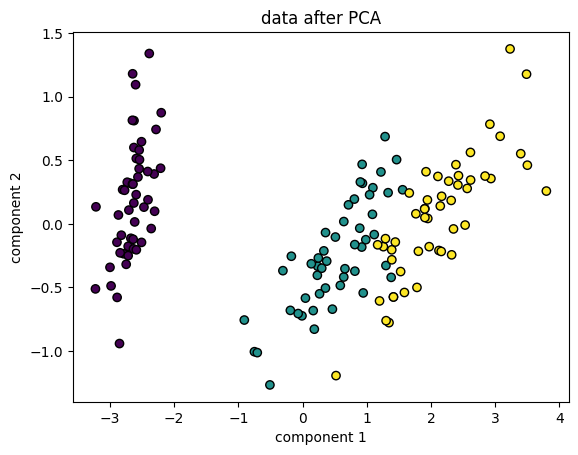

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print(pd.DataFrame(X, columns=iris.feature_names).head()) #原始数据前5行
print(pd.DataFrame(X_pca, columns=['component 1', 'component 2']).head()) #降维后的数据前5行(这个数据是原数据*方向向量*方差占比得到的)
print(pca.components_) #主成分的方向向量
print(pca.explained_variance_ratio_) #每个主成分的方差占比
print(pca.explained_variance_ratio_.sum()) #方差占比之和

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('data after PCA')
plt.show()


#### 2.因子分析(FA)

0.5400766750097201


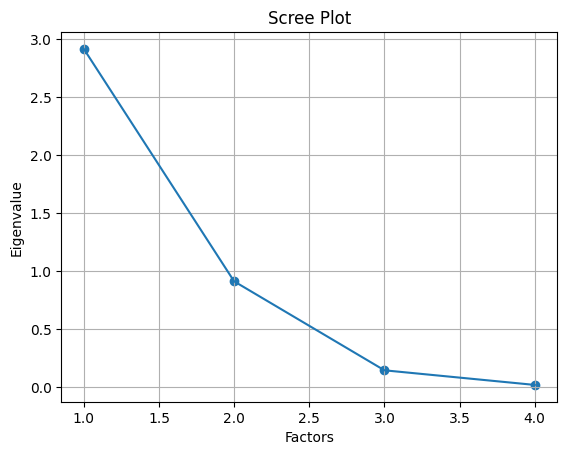

[[ 0.90120549  0.01789008]
 [-0.15041281  0.98619517]
 [ 0.96415345 -0.28461929]
 [ 0.92140124 -0.23324486]]
[2.91849782 0.91403047 0.14675688 0.02071484]
(array([2.61336747, 1.10831228]), array([0.65334187, 0.27707807]), array([0.65334187, 0.93041994]))


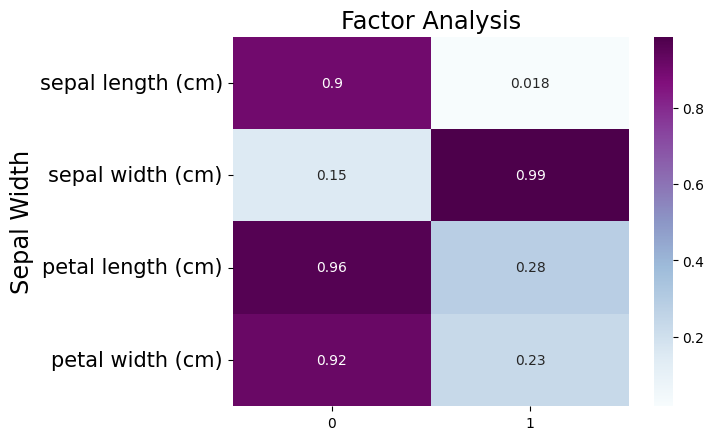

In [8]:
#这里会报一个错误,scipy不含sum,需要将factor_analyzer源码中的sp.sum改为np.sum
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)
print(kmo_model) #如果kmo_model<0.6,说明数据列相关性偏低，不适合做因子分析。。。这里是0.54，不重要，不改了(

from factor_analyzer import FactorAnalyzer
faa = FactorAnalyzer(25,rotation=None)
faa.fit(X)
ev,v=faa.get_eigenvalues() #ev为特征值,v含义不清楚(部分地方解释为特征向量)
plt.scatter(range(1, X.shape[1] + 1), ev)
plt.plot(range(1, X.shape[1] + 1), ev)
plt.title("Scree Plot")  
plt.xlabel("Factors")
plt.ylabel("Eigenvalue")
plt.grid()
plt.show() #根据图像确定因子个数，建议选取特征值大于1的因子，这里选取2个因子

fa = FactorAnalyzer(2, rotation='varimax') #因子旋转，便于解释
fa.fit(X)
print(fa.loadings_) #因子成分矩阵
print(fa.get_eigenvalues()[0]) #特征值
print(fa.get_factor_variance()) #因子方差(总方差，方差贡献率，累计方差贡献率)
new_X = fa.transform(X) #降维后的数据
df = pd.DataFrame(np.abs(fa.loadings_),index=iris.feature_names)
ax = sns.heatmap(df, annot=True, cmap="BuPu")
ax.yaxis.set_tick_params(labelsize=15)
plt.title("Factor Analysis", fontsize="xx-large")
plt.ylabel("Sepal Width", fontsize="xx-large")
plt.show() #因子成分热力图

##### sklearn实现因子分析，本模块存在问题，勿用

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
          0         1
0 -1.327617 -0.561311
1 -1.337639 -0.002798
2 -1.402815  0.306349
3 -1.301043  0.718827
4 -1.333424 -0.364589
[[ 0.72746132 -0.18085204  1.75790224  0.73100458]
 [-0.36874572 -0.24059     0.03551754  0.04526567]]
[0.01609026 0.09807659 0.00405033 0.04071555]
[5.84333333 3.05733333 3.758      1.19933333]
特征值：
 [4.22824171 0.24267075 0.0782095  0.02383509]


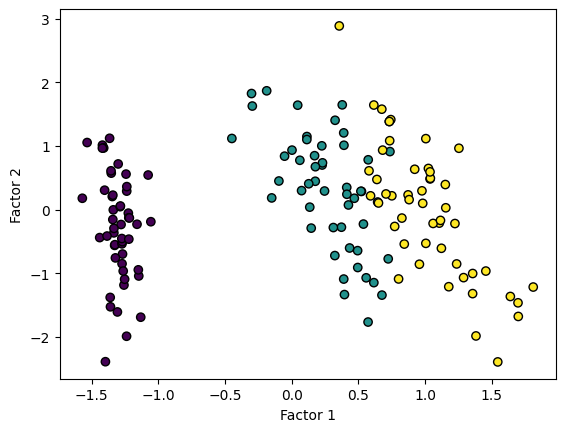

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=2, random_state=42)
X_transformed = fa.fit_transform(X)

print(pd.DataFrame(X, columns=iris.feature_names).head()) #原始数据前5行
print(pd.DataFrame(X_transformed).head()) #数据的因子前5行
print(fa.components_) # 加载矩阵
print(fa.noise_variance_) # 噪声方差
print(fa.mean_) # 均值

plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.show()

#### 3.独立成分分析(ICA)

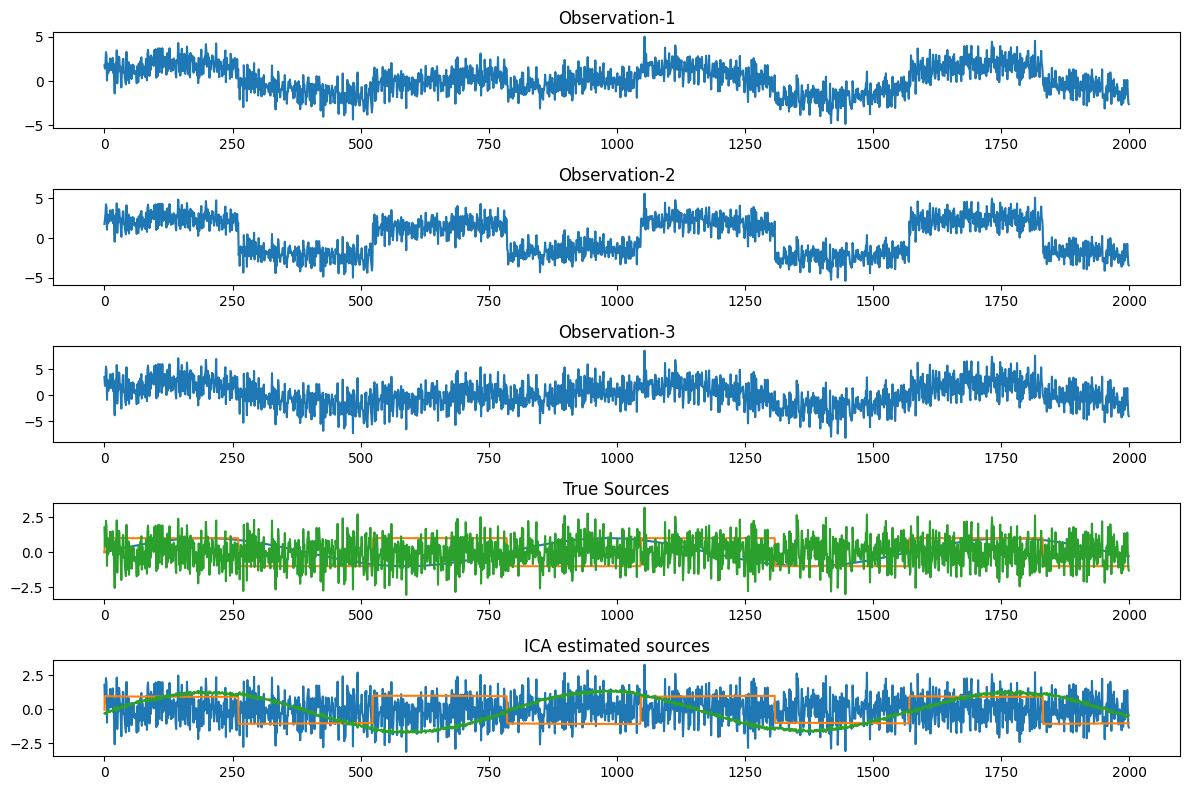

In [ ]:
#ICA用于将经过线性组合的混合信号分离为独立信号，分离出的独立信号数量无法超过原信号数量
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

# 生成混合信号
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)  # 信号1：正弦波
s2 = np.sign(np.sin(3 * time))  # 信号2：方波
s3 = np.random.randn(n_samples)  # 信号3：高斯噪声

S = np.c_[s1, s2, s3]

# 混合信号
A = np.array([[1, 1, 1], [0.5, 2, 1], [1.5, 1, 2]])  # 混合矩阵
X = S.dot(A.T)  # 混合信号

# 使用FastICA进行独立成分分析
ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)  # 估计的源信号

# 绘制结果
S_[:,0:2] = -S_[:,0:2] # 为了和原信号方向一致，取反
plt.figure(figsize=(12, 8))
models = [X[:,0],X[:,1],X[:,2], S, S_]
names = ['Observation-1',
         'Observation-2',
         'Observation-3',
         'True Sources',
         'ICA estimated sources']
for i, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(5, 1, i)
    plt.title(name)
    plt.plot(model)

plt.tight_layout()
plt.show()

### 三、分类/异常值检测

内容摘要：小波分析，K-means聚类，高斯混合聚类，层次聚类，模糊聚类 (,神经网络分类)

#### 1.小波分析

d:\Programs\Python\lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)


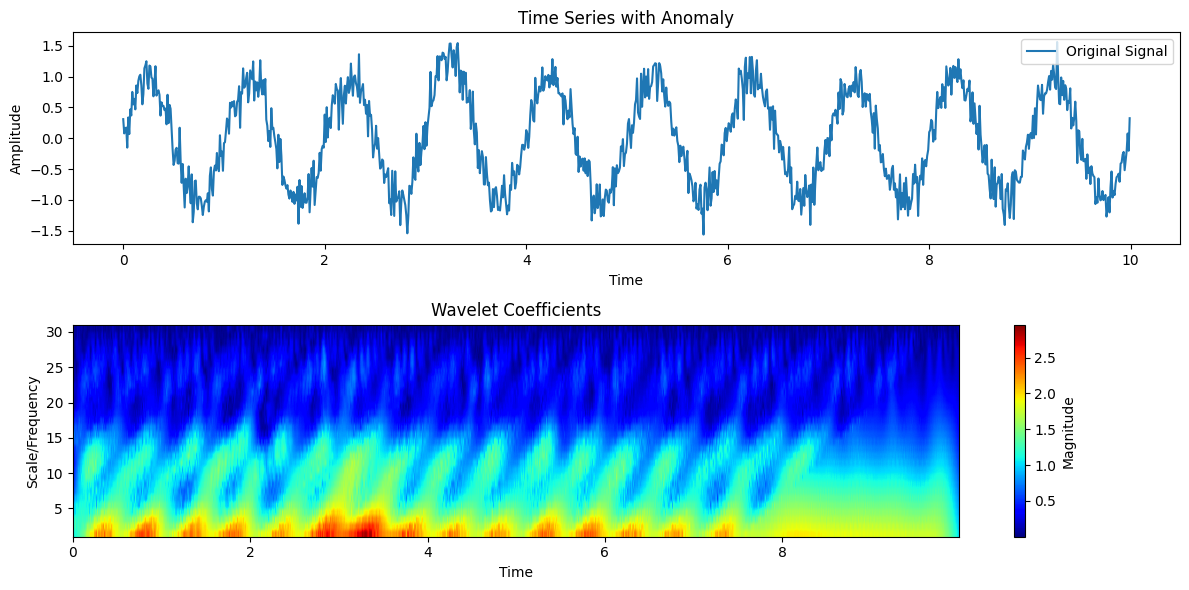

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(14)
time = np.arange(0, 10, 0.01)
signal = np.sin(2 * np.pi * time) + 0.2 * np.random.randn(len(time))  # 生成含噪声的正弦信号
signal[300:350] = signal[300:350] + 0.4*abs(signal[300:350]) # 添加在原始波形中并不明显的异常

import pywt
wavelet = 'cmor' #ChatGPT推荐的查异常值小波cmor(Morlet，泛用，适用周期性、局部震荡)/mexh(Mexican hat，对突变敏感)
#'cmor1.5-1.0'可以指定带宽频率为1.5，中心频率为1.0，但我怎么调参都不如默认，还不知道默认的参数是啥(
coefficients, frequencies = pywt.cwt(signal, np.arange(1, 31), wavelet)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(time, signal, label='Original Signal')
plt.title('Time Series with Anomaly')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.imshow(np.abs(coefficients), extent=[min(time), max(time), 1, 31], aspect='auto', cmap='jet')
plt.colorbar(label='Magnitude')
plt.title('Wavelet Coefficients')
plt.xlabel('Time')
plt.ylabel('Scale/Frequency')

plt.tight_layout()
plt.show()

#### 2.K-Means聚类

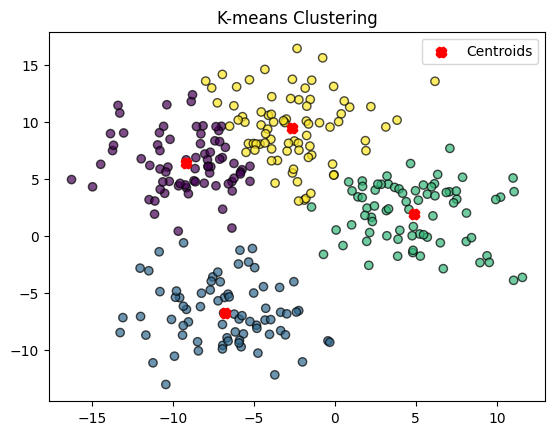

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
data, labels = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=3.0) #data为2列n行数组，labels为1列n行数组

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42) #指定聚类数
kmeans.fit(data)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=30, linewidths=3, color='r', label='Centroids')
plt.title('K-means Clustering')
plt.legend()
plt.show()


#### 3.高斯混合聚类

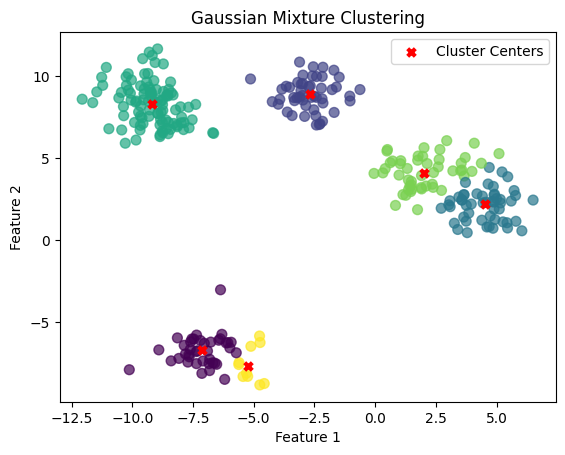

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

from sklearn.datasets import make_blobs
X, labels = make_blobs(n_samples=300, centers=6, random_state=42, cluster_std=1.0)

gmm = GaussianMixture(n_components=6, random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='x', s=30, linewidths=3, color='red', label='Cluster Centers')
plt.title('Gaussian Mixture Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


#### 4.层次聚类

Text(0.5, 1.0, 'Agglomerative Clustering')

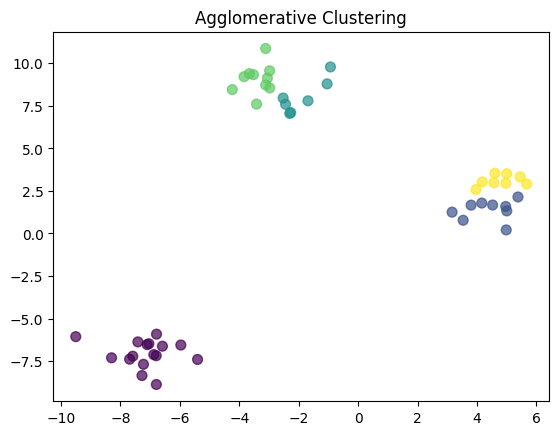

In [35]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=3, random_state=42)

from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5)
labels = model.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.title('Agglomerative Clustering')

[[-2.97867201  9.55684617]
 [ 3.16135685  1.25332548]
 [ 3.48888526  2.3488677 ]
 [ 4.03817222  3.82544787]
 [-1.04354885  8.78850983]
 [-3.52202874  9.32853346]
 [ 5.37834542  2.14453797]
 [-7.34026596 -5.82298737]
 [-2.26723535  7.10100588]
 [-6.5360089  -8.64314975]
 [ 4.52423055  1.67206599]
 [-6.55554322 -7.26519187]
 [ 4.03924015  1.68147593]
 [ 4.84874243  0.01349956]
 [-3.05358035  9.12520872]
 [ 3.31169279  2.17003092]
 [-5.84862767 -5.94882947]
 [-2.44166942  7.58953794]
 [-3.4172217   7.60198243]
 [-7.55654919 -6.2684333 ]
 [-7.71884471 -7.18932197]
 [-7.35880143 -7.06576857]
 [-6.06710137 -5.52386956]
 [ 4.62638161  0.91545875]
 [ 5.46242375  0.75232603]
 [-4.23411546  8.4519986 ]
 [-7.98596217 -8.07631622]
 [-0.92998481  9.78172086]
 [-2.97261532  8.54855637]
 [-6.54836376 -5.90456447]]


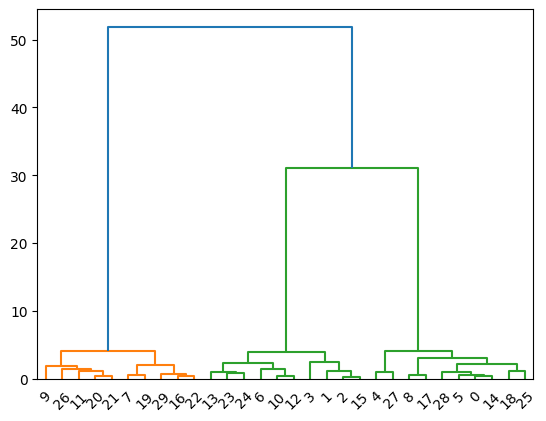

In [2]:
# 可以给出树状图，但似乎很难看懂，不推荐
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=30, centers=3, random_state=42)

from scipy.cluster.hierarchy import linkage, dendrogram
linkage_matrix = linkage(X, method='ward')
dendrogram(linkage_matrix)

plt.show()

#### 5.模糊聚类

(2, 300)


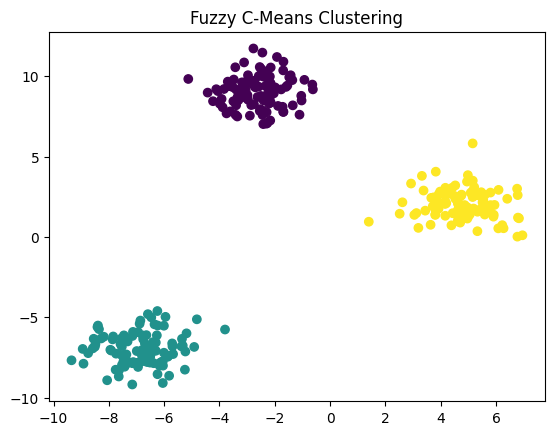

In [44]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
data, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
data = data.T
print(data.shape)

# 使用模糊C均值聚类
import skfuzzy as fuzz
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data, c=3, m=2, error=0.005, maxiter=1000, init=None)
#参数意义：数据，聚类数，加权指数(看不懂算法，反正是参数)，提前停止误差，最大迭代次数，初始隶属度矩阵
#返回值意义：聚类中心，隶属度矩阵，初始隶属度矩阵，到中心距离，目标函数历史，迭代次数，模糊分区系数

# 为了方便绘图，取隶属度最大的类别为聚类结果
cluster_membership = np.argmax(u, axis=0)
plt.scatter(data[0], data[1], c=cluster_membership, cmap='viridis')
plt.title('Fuzzy C-Means Clustering')
plt.show()


#### *6.神经网络分类

我对神经网络了解不是太深，但不围棋时期尝试写Alphazero（死于C++环境配不出来）的经验告诉我，  
这个模型非常简陋,像极了我高中化学竞赛拿着一两百块的计算器只算了两个三位数乘法的样子(  
唯一的意义是证明我电脑能运行chatgpt写的tensorflow代码（还是带着warning跑的


以咱们队伍的配置，神经网络机器学习什么的都不是太推荐用

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# 生成一些示例数据
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 数据预处理
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 构建BP神经网络模型
model = Sequential()
model.add(Dense(10, input_dim=20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 编译模型
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 评估模型
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# 进行预测
predictions = model.predict(X_test)


Epoch 1/10
20/20 [==============================] - 0s 8ms/step - loss: 0.6444 - accuracy: 0.6109 - val_loss: 0.5612 - val_accuracy: 0.6812
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6116 - accuracy: 0.6672 - val_loss: 0.5357 - val_accuracy: 0.7312
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5833 - accuracy: 0.7063 - val_loss: 0.5146 - val_accuracy: 0.7375
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5591 - accuracy: 0.7312 - val_loss: 0.4953 - val_accuracy: 0.7750
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5380 - accuracy: 0.7422 - val_loss: 0.4781 - val_accuracy: 0.7937
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5187 - accuracy: 0.7734 - val_loss: 0.4617 - val_accuracy: 0.8062
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.5008 - accuracy: 0.7844 - val_loss: 0.4466 - val_accuracy: 0.8188
Epoch 8/10
20/20 [==

## 第二部分 优化模型

内容摘要：代数优化，图论

注：实际上，启发式算法和动态规划等也是优化问题的常见(?)解决方法，但是这些算法很难给出一个较为固定的模板

### 一、代数优化

内容摘要：线性规划，非线性优化，全局优化

#### 1.线性规划

In [ ]:
import numpy as np
from scipy.optimize import linprog
c = [-2, 5, -1] #对f(x)=-2x0+5x1-x2求最小值,求最大值时将c取反
A = [[1, 1, 1]]
b = [10] #不等式约束条件为x0+x1+x2<=10
A_eq = [[-1, 3, 2]]
b_eq = [7] #等式约束条件为-x0+3x1+2x2=7
x0_bounds = (0, None)  # x0>=0
x1_bounds = (0, None)  # x1>=0
x2_bounds = (0, 5)     # 0<=x2<=5

result = linprog(c, A_ub=A, b_ub=b, A_eq=A_eq, b_eq=b_eq, bounds=[x0_bounds, x1_bounds, x2_bounds])

print("Optimal values for the variables:", result.x)
print("Optimal objective function value:", result.fun)

Optimal values for the variables: [4.5 0.5 5. ]
Optimal objective function value: -11.5
        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -11.5
              x: [ 4.500e+00  5.000e-01  5.000e+00]
            nit: 2
          lower:  residual: [ 4.500e+00  5.000e-01  5.000e+00]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf  0.000e+00]
                 marginals: [ 0.000e+00  0.000e+00 -4.250e+00]
          eqlin:  residual: [ 0.000e+00]
                 marginals: [ 1.750e+00]
        ineqlin:  residual: [ 0.000e+00]
                 marginals: [-2.500e-01]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


#### 2.非线性优化

In [ ]:
import numpy as np
from scipy.optimize import minimize

def objective(x): #目标函数最小化
    return x[0]**2 + 2 * x[1]**2
def constraint1(x): #约束函数
    return x[0] + x[1] - 1
x0 = np.array([0,1]) #初始值
constraints = ({'type': 'eq', 'fun': constraint1}) #约束条件

result = minimize(objective, x0, constraints=constraints, method='SLSQP') 

print("Optimal values:", result.x)
print("Optimal objectives:", result.fun)


Optimal values: [0.66666667 0.33333333]
Optimal objectives: 0.6666666666666665


#### 3.全局优化

In [1]:
import numpy as np
from scipy.optimize import differential_evolution, NonlinearConstraint

def fun(x):#目标函数,理论最小值位于(1.5,2.25)
    return 100*(x[1] - x[0]**2)**2 + (1.5 - x[0])**2
bounds = [(-1, 4), (-1, 4)] #变量范围
def constraint(x): #以（2，1）为圆心，半径为3的圆
    return (x[0]-2)**2 + (x[1]-1)**2 - 3**2
con = NonlinearConstraint(constraint, -np.inf, 0)

result = differential_evolution(fun, bounds, constraints=con)

print("最优参数:", result.x)
print("最优目标值:", result.fun)


最优参数: [1.5  2.25]
最优目标值: 0.0


### 二、图论

内容摘要：绘图，最短路径，最小生成树，最大流
注：考虑到创建图代码略长，全部放于开头，不再于每个小节中重复

#### 1.绘图

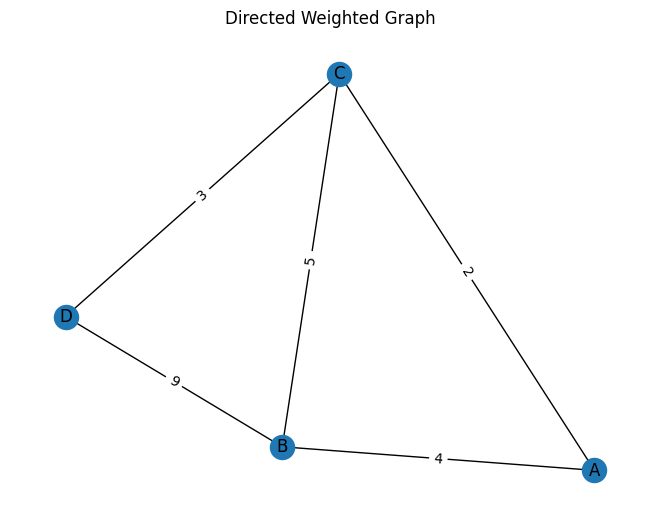

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph() #无向图改用Graph()

edges = [('A', 'B', {'weight': 4,'capacity': 2}),
         ('A', 'C', {'weight': 2,'capacity': 3}),
         ('B', 'C', {'weight': 5,'capacity': 1}),
         ('B', 'D', {'weight': 9,'capacity': 4}),
         ('C', 'D', {'weight': 3,'capacity': 1}),]
G.add_edges_from(edges)

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Directed Weighted Graph")
plt.show()

#### 2.最短路径

In [14]:
shortest_path = nx.shortest_path(G, source='A', target='D', weight='weight')
shortest_path_length = nx.shortest_path_length(G, source='A', target='D', weight='weight')

print(f"Shortest Path : {shortest_path}")
print(f"Shortest Path Length: {shortest_path_length}")

Shortest Path : ['A', 'C', 'D']
Shortest Path Length: 5


#### 3.最小生成树

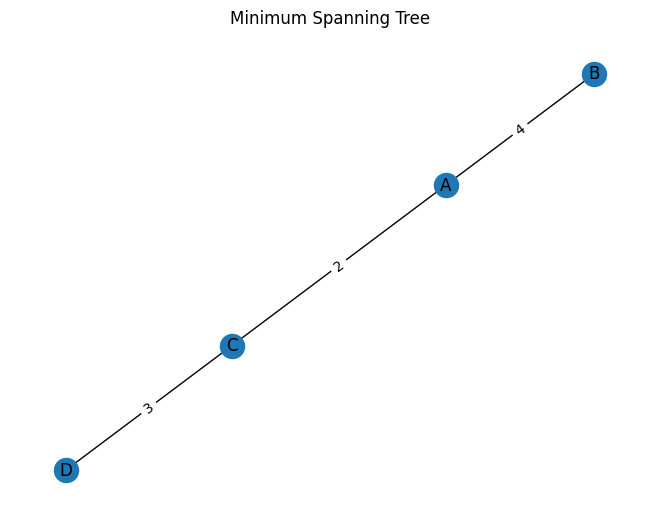

In [16]:
min_spanning_tree = nx.minimum_spanning_tree(G)

pos_tree = nx.spring_layout(min_spanning_tree)
nx.draw(min_spanning_tree, pos_tree, with_labels=True)
labels_tree = nx.get_edge_attributes(min_spanning_tree, 'weight')
nx.draw_networkx_edge_labels(min_spanning_tree, pos_tree, edge_labels=labels_tree)
plt.title("Minimum Spanning Tree")
plt.show()

#### 4.最大流

Maximum Flow: 4


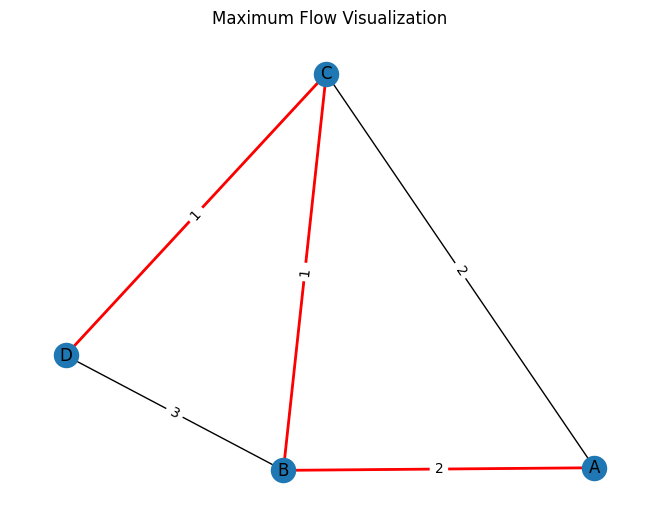

In [5]:
max_flow_value, max_flow_dict = nx.maximum_flow(G, _s='A', _t='D', capacity='capacity')

print(f"Maximum Flow: {max_flow_value}")

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
max_flow_edges = [(u, v) for u, flow_dict in max_flow_dict.items() for v, flow in flow_dict.items() if flow == G[u][v]['capacity']]
nx.draw_networkx_edges(G, pos, edgelist=max_flow_edges, edge_color='red', width=2)
edge_labels = {(u, v): flow for u, flow_dict in max_flow_dict.items() for v, flow in flow_dict.items() if flow > 0}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Maximum Flow Visualization")
plt.show()

## 第三部分 预测模型

内容摘要：灰色预测(GM(1,1)),微分方程预测,回归分析预测,马尔科夫预测,时间序列预测(,神经网络预测)

### 一、灰色预测(GM(1,1))

In [1]:
#我再也不自己写这玩意了，这段代码花了我两三个小时，ChatGPT总得犯几个错，NewBing更是没几句对的
import numpy as np
from scipy.optimize import leastsq

def GM_11_pretest(data):
    ago_sequence = np.cumsum(data)
    smooth_ratios = ago_sequence[1:] / ago_sequence[:-1]
    smooth_ratios = smooth_ratios[1:]
    satisfying_ratios = (smooth_ratios >= 1) & (smooth_ratios <= 1.5)
    satisfying_ratio_percentage = np.sum(satisfying_ratios) / len(satisfying_ratios)
    return satisfying_ratio_percentage

def GM_11_minfunc(params, B, Y):
    x0, b = params
    return B.dot(params) - Y

def GM_11_fit(data):
    X1 = data.cumsum()
    X1 = (X1[:-1]+X1[1:])/2.0
    B = np.vstack((-X1, np.ones(len(X1)))).T
    Y = data[1:]
    p, pcov = leastsq(GM_11_minfunc, [1, 1], args=(B, Y))
    return p

def GM_11_sum_predicate(x0, a, b, x):
    if(x < 0):
        return 0
    return (x0 - b / a) * np.exp(-a * x) + b / a

def GM_11_predicate(x0, a, b, x):
    return GM_11_sum_predicate(x0, a, b, x) - GM_11_sum_predicate(x0, a, b, x - 1)

def GM_11_posttest(data, p):#均方差比，平均相对误差
    a, b = p
    x0 = data[0]
    x_pred = np.array([GM_11_predicate(x0, a, b, i) for i in range(len(data))])
    e = data - x_pred
    S1 = np.array(data).var()
    S2 = np.array(e).var()
    MSER = S2 / S1
    MRE = np.abs(e / data).mean()
    return MSER, MRE

In [3]:
import numpy as np

data = np.array([71.1, 72.4, 72.4, 72.1, 71.4, 72.0, 71.6])

print("准指数规律检验结果：",GM_11_pretest(data))

a, b = GM_11_fit(data)
next_value = GM_11_predicate(data[0], a, b, len(data))

print("原始数据：", data)
print("GM(1,1)预测结果：", next_value)
MSER, MRE = GM_11_posttest(data, [a, b])
print("MSER:", MSER, "MRE:", MRE)

准指数规律检验结果： 1.0
原始数据： [64.  31.  17.   7.5  4.   2.   1.2]
GM(1,1)预测结果： 0.6181460783640631
MSER: 0.0007042722764855224 MRE: 0.06005334100006892


### 二、微分方程预测

内容摘要：常微分方程数值解，偏微分方程数值解，常微分方程解析解

微分方程需要根据实际情况自行编写，这里只给出解方程的代码

#### 1.常微分方程数值解

### 三、回归分析预测

### 四、马尔科夫预测

### 五、时间序列预测

### *六、神经网络预测

## 第四部分 评价模型

内容摘要：模糊综合评价，层次分析法，数据包络分析法，TOPSIS评价法(，*神经网络评价)

### 一、模糊综合评价

### 二、层次分析法

### 三、数据包络分析法

### 四、TOPSIS评价法

### *五、神经网络评价